In [12]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [13]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction','Household net adjusted disposable income','Household net financial wealth']].iloc[keep_indices]
    #return full_country_stats

In [14]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
 
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
 
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"], country_stats['Household net adjusted disposable income'], country_stats['Household net financial wealth']]
y = np.c_[country_stats["Life satisfaction"]]

print(country_stats)
#print(X)
#print(y)

                 GDP per capita  Life satisfaction  \
Country                                              
Russia                 9054.914                6.0   
Turkey                 9437.372                5.6   
Hungary               12239.894                4.9   
Poland                12495.334                5.8   
Slovak Republic       15991.736                6.1   
Estonia               17288.083                5.6   
Greece                18064.288                4.8   
Portugal              19121.592                5.1   
Slovenia              20732.482                5.7   
Spain                 25864.721                6.5   
Korea                 27195.197                5.8   
Italy                 29866.581                6.0   
Japan                 32485.545                5.9   
Israel                35343.336                7.4   
New Zealand           37044.891                7.3   
France                37675.006                6.5   
Belgium               40106.

<AxesSubplot:xlabel='Household net financial wealth', ylabel='Life satisfaction'>

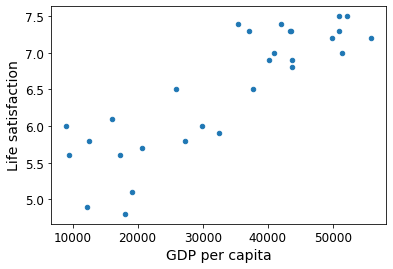

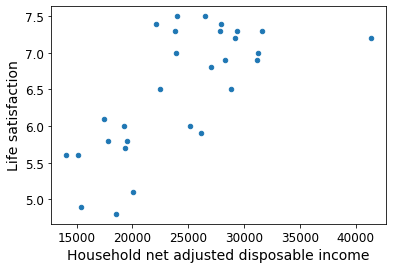

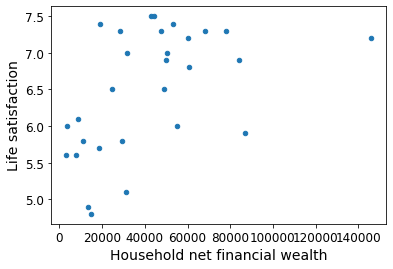

In [19]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
country_stats.plot(kind='scatter', x="Household net adjusted disposable income", y='Life satisfaction')
country_stats.plot(kind='scatter', x="Household net financial wealth", y='Life satisfaction')


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Transforming the x data into a polynomial
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

# Definition of the model
poly_model = LinearRegression()

# Training of the model with the polynomial
poly_model.fit(x_poly, y)

# For 2015
X_now = [[1784,5656,343]] 
X_now_poly = polynomial_features.fit_transform(X_now)

# Printing out the prediction
print(poly_model.predict(X_now_poly))


# For 2020
X_now = [[2226,43,54]] 
X_now_poly = polynomial_features.fit_transform(X_now)

# Printing out the prediction
print(poly_model.predict(X_now_poly))


[[4.29648051]]
[[5.35043041]]
